In [46]:
# Imports
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [97]:
# Import data
TRAIN_RPATH = os.path.join("cs5228", "train.csv")
TEST_RPATH = os.path.join("cs5228", "test.csv")

# Raw data
data_train = pd.read_csv(TRAIN_RPATH, skipinitialspace=True)
data_test = pd.read_csv(TEST_RPATH, skipinitialspace=True)

# Combine data to facilitate preprocessing
nolabel_train = data_train.drop(["exceeds50K"], axis=1, inplace=False)
combined_data = nolabel_train.append(data_test)
idx = pd.Series(["train","test"]).repeat([data_train.shape[0],data_test.shape[0]])
combined_data.set_index([idx, combined_data.index], inplace=True)

# Subset of rows
combined_data[data_train.shape[0]-5:(data_test.shape[0]+5)]

age    workclass  fnlwgt     education  education-num  \
train 24416   44      Private  104196       Masters             14   
      24417   52      Private  112959  Some-college             10   
      24418   50    State-gov  263200     Assoc-voc             11   
      24419   25      Private  228608  Some-college             10   
      24420   57  Federal-gov  140711     Bachelors             13   
test  0       23      Private   32732  Some-college             10   
      1       69      Private  165017       HS-grad              9   
      2       27      Private   36440     Bachelors             13   
      3       40      Private  182217  Some-college             10   
      4       24      Private   89347          11th              7   

                 marital-status         occupation    relationship     sex  \
train 24416  Married-civ-spouse    Exec-managerial         Husband    Male   
      24417             Widowed              Sales   Not-in-family  Female   
      24418            Divorced       Adm-clerical       Unmarried  Female   
      24419       Never-married       Craft-repair  Other-relative  Female   
      24420  Married-civ-spouse     Prof-specialty         Husband    Male   
test  0      Married-civ-spouse              Sales         Husband    Male   
      1                 Widowed  Machine-op-inspct       Unmarried    Male   
      2           Never-married              Sales   Not-in-family  Female   
      3      Married-civ-spouse      Other-service            Wife  Female   
      4           Never-married  Machine-op-inspct   Not-in-family  Female   

             capital-gain  capital-loss  hours-per-week native-country  
train 24416             0             0              45  United-States  
      24417             0             0              40  United-States  
      24418             0             0              40        Ecuador  
      24419             0             0              40       Cambodia  
      24420             0             0              40  United-States  
test  0                 0             0              25  United-States  
      1              2538             0              40  United-States  
      2                 0             0              40  United-States  
      3                 0             0              40       Scotland  
      4                 0             0              40  United-States

In [98]:
# Dropping rows with missing values
combined_data.replace('?', np.nan, inplace=True)
combined_data.dropna(inplace=True)
data_train.replace('?', np.nan, inplace=True)
data_train.dropna(inplace=True)

# # Duplicate rows exist
# print(combined_data[combined_data.duplicated(keep=False)])
# print(data_train[data_train.duplicated(keep=False)])

# Drop duplicate rows
combined_data.drop_duplicates(inplace=True)
data_train.drop_duplicates(inplace=True)

In [99]:
# # Rows either have an entry in capital-gain or capital-loss
# logi_idx = (combined_data["capital-gain"] != 0)|(combined_data["capital-loss"] != 0)
# logi_idx2 = (combined_data["capital-gain"] != 0)&(combined_data["capital-loss"] != 0)
# print(combined_data.loc[logi_idx, ["capital-gain","capital-loss"]])

# Combine attributes capital-gain and capital-loss into one attribute
combined_data.insert(9, "net_capital_gain",
                     combined_data["capital-gain"] - combined_data["capital-loss"])
combined_data.drop(["capital-gain","capital-loss"], 1, inplace=True)
print(combined_data.head())

         age     workclass  fnlwgt     education  education-num  \
train 1   60       Private  173960     Bachelors             13   
      3   37       Private  112497     Bachelors             13   
      4   63       Private  137843  Some-college             10   
      5   23     State-gov   82067     Assoc-voc             11   
      6   47  Self-emp-inc  212120       HS-grad              9   

             marital-status       occupation   relationship     sex  \
train 1            Divorced   Prof-specialty  Not-in-family  Female   
      3  Married-civ-spouse            Sales        Husband    Male   
      4  Married-civ-spouse            Sales        Husband    Male   
      5  Married-civ-spouse  Protective-serv        Husband    Male   
      6  Married-civ-spouse     Craft-repair        Husband    Male   

         net_capital_gain  hours-per-week native-country  
train 1                 0              42  United-States  
      3                 0              60  United-St

In [91]:
# Discretise Native Country

/home/dblux/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/dblux/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


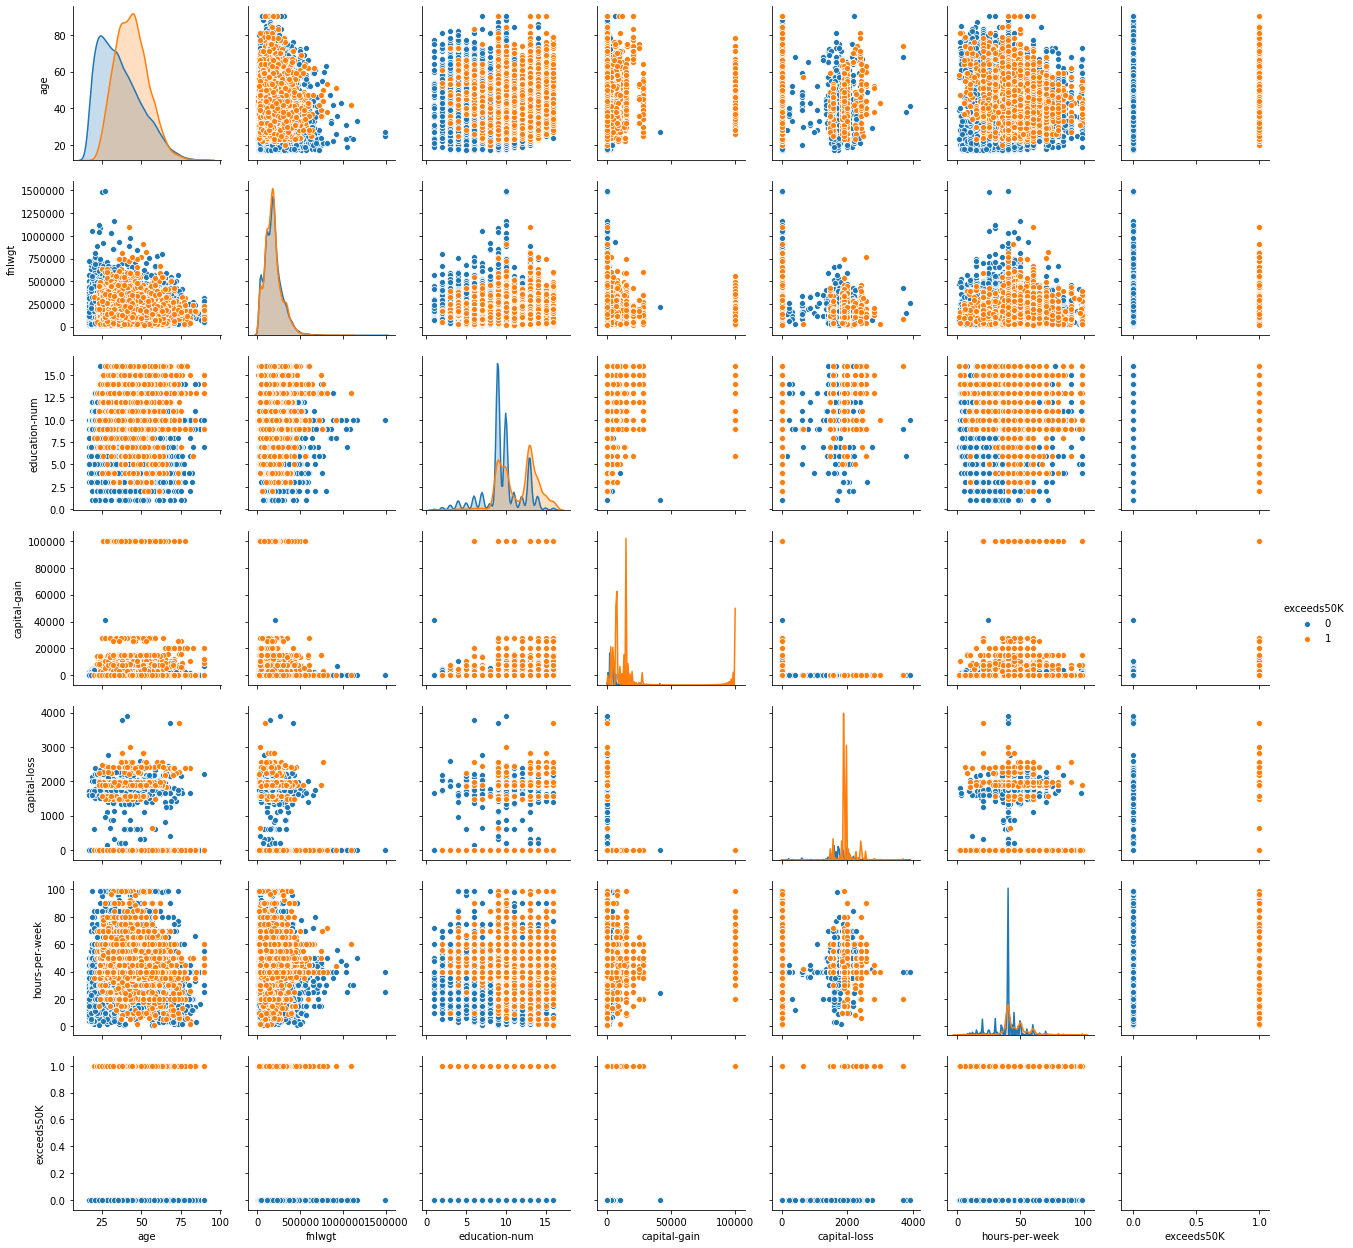

In [92]:
### Exploratory data analysis
# Pairwise plot
sns.pairplot(data_train, hue="exceeds50K")

In [93]:
## Check for outliers
# Continuous attributes
print(combined_data.age.describe())
print(combined_data["hours-per-week"].describe())
print(combined_data["net_capital_gain"].describe())

# No outliers detected!

count    45170.000000
mean        38.555878
std         13.215965
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64
count    45170.000000
mean        40.942395
std         12.008316
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64
count    45170.000000
mean      1014.000908
std       7534.570243
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: net_capital_gain, dtype: float64


Mexico                        456
Philippines                   139
Germany                       101
Puerto-Rico                    86
El-Salvador                    82
India                          79
Canada                         75
Cuba                           69
Italy                          55
England                        55
China                          54
Jamaica                        52
Japan                          47
South                          46
Guatemala                      45
Poland                         45
Columbia                       44
Dominican-Republic             43
Vietnam                        40
Portugal                       38
Iran                           33
Haiti                          33
Taiwan                         30
Greece                         26
Nicaragua                      25
Peru                           25
Ecuador                        23
Ireland                        19
France                         19
Laos          

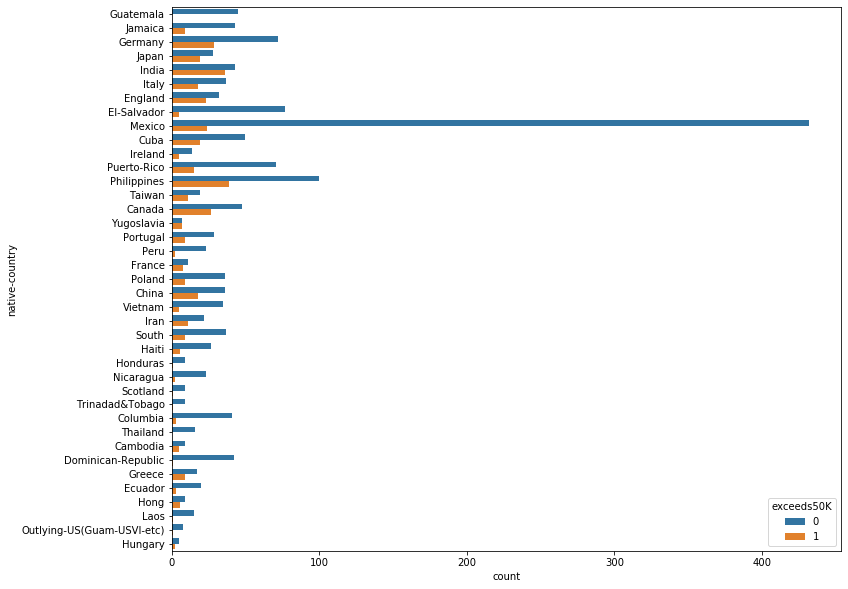

In [101]:
# Proportions
# fig, ax = plt.subplots(1,1, figsize=(12,8))
# sns.catplot(y="native-country", hue="exceeds50K", kind="count", data=data_train, ax=ax)
# sns.catplot(y="native-country", kind="count", data=train, ax=ax[1])
# sns.catplot(y="native-country", kind="count", data=X_test, ax=ax[2])

# Should we discretize native-country?
other_countries = data_train.loc[data_train["native-country"] != "United-States",
                                 ["native-country", "exceeds50K"]]

fig, ax = plt.subplots(1, 1, figsize=(12,10))
sns.countplot(y="native-country", hue="exceeds50K", data=other_countries, ax=ax)

other_countries["native-country"].value_counts()

In [43]:
# Removing features
combined_data.drop(["fnlwgt","education"], inplace=True)

# Discreting features

count    2.261900e+04
mean     1.889370e+05
std      1.047652e+05
min      1.376900e+04
25%      1.174990e+05
50%      1.779550e+05
75%      2.367500e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64
count    22619.000000
mean      1130.704938
std       7641.089052
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64
count    22619.000000
mean        87.323047
std        400.823831
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3900.000000
Name: capital-loss, dtype: float64


In [ ]:
# Labels
# X_train = train.drop(["exceeds50K"], axis=1)
# print(train.shape, X_train.shape, X_test.shape)

In [ ]:
# checking that education-num is the encoded version of education, drop education
print(train.groupby(["education-num", "education"]).size().reset_index().rename(columns={0:'count'})) # -> education num = education encoded